In [2]:
# Resorce : https://youtu.be/2uvysYbKdjM?si=aj8S8siBAxGJiSxu
import pandas as pd

# Loading in DataFrame from Files

In [32]:
coffee = pd.read_csv('./warmup-data/coffee.csv')
coffee.head()

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35


In [6]:
results = pd.read_parquet('./data/results.parquet')
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,None
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,None
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,None
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,None
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,None


In [12]:
olympics_data = pd.read_excel('./data/olympics-data.xlsx')
olympics_data.head()

bios = pd.read_csv('./data/bios.csv')

# Accessing Data with Pandas

## head, tails and sample

In [ ]:
coffee.head(10)
coffee.tail(4)
coffee.sample(10, random_state=1) # => data gets print in random

## loc and iloc

In [ ]:
# LOC : allows us to filter by rows and columns with both index and values
# Syntax:  coffee.loc[Row,Column]
# coffee.loc[0]
# coffee.loc[[0,1,3]]
# coffee.loc["Monday":"Wednesday"]
# coffee.loc[2: , ["Day","Units Sold"]]
# coffee.loc[1, "Units Sold"] = 10 # update data 
coffee.head()


In [14]:
#ILOC : use index locations vales not supported
coffee.iloc[2:, [0,2]]

,Day,Units Sold
2,Tuesday,30
3,Tuesday,20
4,Wednesday,35
5,Wednesday,25
6,Thursday,40
7,Thursday,30
8,Friday,45
9,Friday,35
10,Saturday,45
11,Saturday,35


In [15]:
# at -> get specific values
coffee.at[0, "Units Sold"]

np.int64(25)

In [16]:
coffee["Units Sold"]
coffee.Day

0        Monday
1        Monday
2       Tuesday
3       Tuesday
4     Wednesday
5     Wednesday
6      Thursday
7      Thursday
8        Friday
9        Friday
10     Saturday
11     Saturday
12       Sunday
13       Sunday
Name: Day, dtype: object

In [17]:
# sort
coffee.sort_values("Units Sold", ascending= False)
coffee.sort_values(["Units Sold","Coffee Type"], ascending= False)



,Day,Coffee Type,Units Sold
8,Friday,Espresso,45
10,Saturday,Espresso,45
12,Sunday,Espresso,45
6,Thursday,Espresso,40
9,Friday,Latte,35
11,Saturday,Latte,35
13,Sunday,Latte,35
4,Wednesday,Espresso,35
7,Thursday,Latte,30
2,Tuesday,Espresso,30


In [25]:
# Iteraltion
for index, row in coffee.iterrows():
    print(index)
    print(row) # we can also specify row like : print(row["Unit Sold"]) 
    print("\n\n\n\n")

0
25





1
10





2
30





3
20





4
35





5
25





6
40





7
30





8
45





9
35





10
45





11
35





12
45





13
35







# Filtering Data

In [17]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [18]:
bios.tail()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18
145499,149814,Bill Phillips,1913-07-15,Dulwich Hill,New South Wales,AUS,Australia,NaN,NaN,2003-10-20


In [19]:
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


In [43]:
# bios.loc[bios["height_cm"] > 215] # or -> bios.loc[bios["height_cm"] > 215, ["name", "height_cm"]]
bios[bios["height_cm"] > 215]# or -> bios[bios["height_cm"] > 215][["name", "height_cm"]]

# multiple conditions
bios[(bios["height_cm"] > 215) & (bios["born_country"] == "FRA")]

# filter with contains
bios[bios["name"].str.contains("Keith", case = False)]
bios[bios["name"].str.contains("Keith|patrick", case = False)]

# with in
bios[bios["born_country"].isin(["USA","FRA"])] # also can give multiple with &


,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
5,6,Nicolas Chatelain,1970-01-13,Amiens,Somme,FRA,France,181.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...
145454,149180,Anna Hoffmann,2000-03-28,Madison,Wisconsin,USA,United States,NaN,NaN,NaN
145457,149183,Alix Wilkinson,2000-08-02,Mammoth Lakes,California,USA,United States,NaN,NaN,NaN
145467,149194,Elisa Nakab,1998-05-08,Briançon,Hautes-Alpes,FRA,Italy,NaN,NaN,NaN
145468,149195,Justin Abdelkader,1987-02-25,Muskegon,Michigan,USA,United States,187.0,97.0,NaN


In [47]:
# filter with query
bios.query('born_country == "USA" or name == "deepak"') # more easier

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
54,55,Monique Javer,1967-07-22,Burlingame,California,USA,Great Britain,177.0,64.0,NaN
960,964,Xóchitl Escobedo,1968-09-17,West Covina,California,USA,Mexico,170.0,60.0,NaN
961,965,Angélica Gavaldón,1973-10-03,El Centro,California,USA,Mexico,160.0,54.0,NaN
1231,1238,Bert Schneider,1897-07-01,Cleveland,Ohio,USA,Canada,NaN,NaN,1986-02-20
1345,1352,Laura Berg,1975-01-06,Santa Fe Springs,California,USA,United States,168.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...
145445,149168,Kristen Santos,1994-11-02,Fairfield,Connecticut,USA,United States,NaN,NaN,NaN
145446,149169,Corinne Stoddard,2001-08-15,Seattle,Washington,USA,United States,NaN,NaN,NaN
145454,149180,Anna Hoffmann,2000-03-28,Madison,Wisconsin,USA,United States,NaN,NaN,NaN
145457,149183,Alix Wilkinson,2000-08-02,Mammoth Lakes,California,USA,United States,NaN,NaN,NaN


# Adding / Removing Columns

In [7]:
# Adding column
# coffee['price'] = 4.99
# coffee


import numpy as np
coffee['new_price'] = np.where(coffee['Coffee Type'] == 'Espresso', 3.99, 5.99)
coffee

,Day,Coffee Type,Units Sold,new_price
0,Monday,Espresso,25,3.99
1,Monday,Latte,15,5.99
2,Tuesday,Espresso,30,3.99
3,Tuesday,Latte,20,5.99
4,Wednesday,Espresso,35,3.99
5,Wednesday,Latte,25,5.99
6,Thursday,Espresso,40,3.99
7,Thursday,Latte,30,5.99
8,Friday,Espresso,45,3.99
9,Friday,Latte,35,5.99


In [ ]:
# Drop: returns a updated/ deleted dataframe
coffee.drop(0)
# coffee.drop(columns=['price'], inplace=True)


In [38]:
coffee_new = coffee.copy()
coffee_new["price"] = 19.99

coffee
coffee_new

,Day,Coffee Type,Units Sold,price
0,Monday,sugar,25,19.99
1,Monday,sugar,15,19.99
2,Tuesday,Espresso,30,19.99
3,Tuesday,Latte,20,19.99
4,Wednesday,Espresso,35,19.99
5,Wednesday,Latte,25,19.99
6,Thursday,Espresso,40,19.99
7,Thursday,Latte,30,19.99
8,Friday,Espresso,45,19.99
9,Friday,Latte,35,19.99


In [40]:
# Calculating Revenue
coffee_new['revenue'] = coffee_new['Units Sold'] * coffee_new['price']
coffee_new

,Day,Coffee Type,Units Sold,price,revenue
0,Monday,sugar,25,19.99,499.75
1,Monday,sugar,15,19.99,299.85
2,Tuesday,Espresso,30,19.99,599.70
3,Tuesday,Latte,20,19.99,399.80
4,Wednesday,Espresso,35,19.99,699.65
5,Wednesday,Latte,25,19.99,499.75
6,Thursday,Espresso,40,19.99,799.60
7,Thursday,Latte,30,19.99,599.70
8,Friday,Espresso,45,19.99,899.55
9,Friday,Latte,35,19.99,699.65


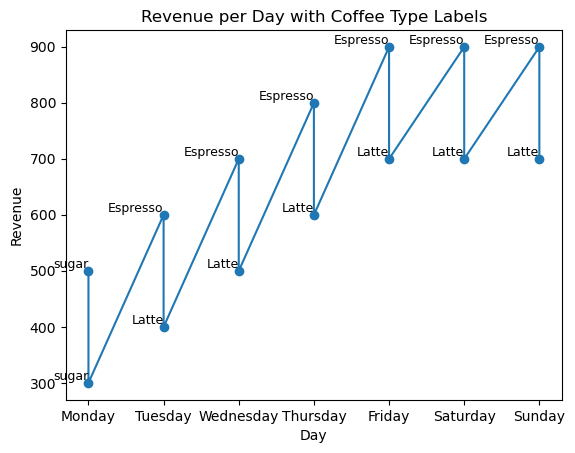

In [42]:
import matplotlib.pyplot as plt

# Plot the revenue points
plt.plot(coffee_new["Day"], coffee_new["revenue"], marker="o")

# Add labels for each point
for i, coffee_type in enumerate(coffee_new["Coffee Type"]):
    plt.text(coffee_new["Day"][i], coffee_new["revenue"][i], coffee_type,
             fontsize=9, ha='right', va='bottom')

# Labels
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.title("Revenue per Day with Coffee Type Labels")

plt.show()

In [ ]:
coffee["price"] = 1000
coffee

# Rename column:

In [18]:
coffee.rename(columns = {'price':'new_price'})

,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


In [19]:
bios_new = bios.copy()
bios_new['first_name'] = bios_new['name'].str.split(' ').str[0]
bios_new.query('first_name == "Jean"') # query specific names 

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_category,first_name
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Average,Jean
682,685,Jean Washer,1894-08-22,Berchem,Antwerpen,BEL,Belgium,NaN,NaN,1972-03-23,Tall,Jean
1301,1308,Jean Bassomben,1943-04-11,NaN,NaN,NaN,Cameroon,182.0,86.0,NaN,Average,Jean
2998,3010,Jean Ces,1906-09-05,Béziers,Hérault,FRA,France,NaN,NaN,1969-12-25,Tall,Jean
3010,3022,Jean Despeaux,1915-10-22,Paris Xe,Paris,FRA,France,NaN,NaN,1989-05-25,Tall,Jean
...,...,...,...,...,...,...,...,...,...,...,...,...
137390,140744,Jean van der Westhuyzen,1998-12-09,Cape Town,Western Cape,RSA,Australia,184.0,NaN,NaN,Average,Jean
138838,142265,Jean Carlos Caicedo,1995-01-10,Montecristi,Manabí,ECU,Ecuador,NaN,NaN,NaN,Tall,Jean
139464,142937,Jean Patry,1996-12-27,Montpellier,Hérault,FRA,France,NaN,NaN,NaN,Tall,Jean
139859,143349,Jean Paul Bredau,1999-06-27,Potsdam,Brandenburg,GER,Germany,190.0,82.0,NaN,Tall,Jean


In [53]:
# bios_new.info()
bios_new['born_datetime'] = pd.to_datetime(bios_new["born_date"], format='%Y-%m-%d')
bios_new['born_year'] = bios_new['born_datetime'].dt.year
bios_new[['name','born_year']]

,name,born_year
0,Jean-François Blanchy,1886.0
1,Arnaud Boetsch,1969.0
2,Jean Borotra,1898.0
3,Jacques Brugnon,1895.0
4,Albert Canet,1878.0
...,...,...
145495,Polina Luchnikova,2002.0
145496,Valeriya Merkusheva,1999.0
145497,Yuliya Smirnova,1998.0
145498,André Foussard,1899.0


In [46]:
bios_new.to_csv('./data/bios.csv', index = False)

In [ ]:
bios['height_category'] = bios['height_cm'].apply(lambda x : 'Short' if x < 165 else('Average' if x < 185 else 'Tall'))
bios.head()

In [56]:
def categorize_athlete(row):
    if row['height_cm'] < 175 and row['weight_kg'] < 70:
        return 'Lightweight'

    elif row['height_cm'] < 185 or row['weight_kg'] <= 80:
        return 'Middleweight'
    else :
        return 'Heavyweight'

bios['Category'] = bios.apply(categorize_athlete, axis=1)

bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_category,Category
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Tall,Heavyweight
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Average,Middleweight
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Average,Middleweight
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Average,Lightweight
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Tall,Heavyweight


# Merging & Concatenating Data

In [21]:

nocs = pd.read_csv('./data/noc_regions.csv')

nocs.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [32]:
bios_new = pd.merge(bios, nocs, left_on = "born_country", right_on = "NOC", how = 'left')

In [27]:
bios_new

,athlete_id,name,born_date,born_city,born_region,born_country,NOC_x,height_cm,weight_kg,died_date,height_category,first_name,NOC_y,region,notes
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Tall,Jean-François,FRA,France,NaN
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Average,Arnaud,FRA,France,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Average,Jean,FRA,France,NaN
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Average,Jacques,FRA,France,NaN
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Tall,Albert,GBR,UK,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN,Average,Polina,RUS,Russia,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN,Average,Valeriya,RUS,Russia,NaN
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN,Short,Yuliya,RUS,Russia,NaN
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18,Average,André,FRA,France,NaN


In [37]:
# Rename columns:
bios_new.rename(columns={'region': 'born_country_full'}, inplace=True)

bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC_x,height_cm,weight_kg,died_date,height_category,first_name,NOC_y,born_country_full,notes
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Tall,Jean-François,FRA,France,NaN
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Average,Arnaud,FRA,France,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Average,Jean,FRA,France,NaN
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Average,Jacques,FRA,France,NaN
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Tall,Albert,GBR,UK,NaN


In [39]:
bios_new[bios_new['NOC_x'] != bios_new['born_country_full']]


,athlete_id,name,born_date,born_city,born_region,born_country,NOC_x,height_cm,weight_kg,died_date,height_category,first_name,NOC_y,born_country_full,notes
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Tall,Albert,GBR,UK,NaN
12,13,J. Defert,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,Tall,J.,NaN,NaN,NaN
13,14,Étienne Durand,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,Tall,Étienne,NaN,NaN,NaN
16,17,Guy Forget,1965-01-04,Casablanca,Casablanca-Settat,MAR,France,189.0,79.0,NaN,Tall,Guy,MAR,Morocco,NaN
27,28,"Guy, Baron Lejeune",NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,Tall,"Guy,",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145491,149218,Matthew Wepke,1989-12-05,NaN,NaN,NaN,Jamaica,NaN,NaN,NaN,Tall,Matthew,NaN,NaN,NaN
145493,149220,Landysh Falyakhova,1998-08-31,Dva Polya Artash,Respublika Tatarstan,RUS,ROC,NaN,NaN,NaN,Tall,Landysh,RUS,Russia,NaN
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN,Average,Polina,RUS,Russia,NaN
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN,Average,Valeriya,RUS,Russia,NaN


In [38]:
list(bios_new.columns)


['athlete_id',
 'name',
 'born_date',
 'born_city',
 'born_region',
 'born_country',
 'NOC_x',
 'height_cm',
 'weight_kg',
 'died_date',
 'height_category',
 'first_name',
 'NOC_y',
 'born_country_full',
 'notes']

In [44]:
# take specific people based on country
usa = bios[bios['born_country'] == 'USA'].copy()
gbr = bios[bios['born_country'] == 'GBR'].copy()

usa
gbr


,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_category,first_name
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Tall,Albert
37,38,Helen Aitchison,1881-12-06,Sunderland,England,GBR,Great Britain,NaN,NaN,1947-05-26,Tall,Helen
38,39,Geraldine Beamish,1883-06-23,Forest Gate,England,GBR,Great Britain,NaN,NaN,1972-05-10,Tall,Geraldine
39,40,Dora Boothby,1881-08-02,Finchley,England,GBR,Great Britain,NaN,NaN,1970-02-22,Tall,Dora
40,41,Julie Bradbury,1967-02-12,Oxford,England,GBR,Great Britain,175.0,64.0,NaN,Average,Julie
...,...,...,...,...,...,...,...,...,...,...,...,...
144811,148512,Benjamin Alexander,1983-05-08,London,England,GBR,Jamaica,NaN,NaN,NaN,Tall,Benjamin
144815,148517,Ashley Watson,1993-10-28,Peterborough,England,GBR,Jamaica,NaN,NaN,NaN,Tall,Ashley
145005,148716,Peder Kongshaug,2001-08-13,Wimbledon,England,GBR,Norway,184.0,86.0,NaN,Average,Peder
145319,149041,Axel Brown,1992-04-02,Harrogate,England,GBR,Trinidad and Tobago,NaN,NaN,NaN,Tall,Axel


In [48]:
# Concat
new_df = pd.concat([usa,gbr])
new_df

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_category,first_name
54,55,Monique Javer,1967-07-22,Burlingame,California,USA,Great Britain,177.0,64.0,NaN,Average,Monique
960,964,Xóchitl Escobedo,1968-09-17,West Covina,California,USA,Mexico,170.0,60.0,NaN,Average,Xóchitl
961,965,Angélica Gavaldón,1973-10-03,El Centro,California,USA,Mexico,160.0,54.0,NaN,Short,Angélica
1231,1238,Bert Schneider,1897-07-01,Cleveland,Ohio,USA,Canada,NaN,NaN,1986-02-20,Tall,Bert
1345,1352,Laura Berg,1975-01-06,Santa Fe Springs,California,USA,United States,168.0,61.0,NaN,Average,Laura
...,...,...,...,...,...,...,...,...,...,...,...,...
144811,148512,Benjamin Alexander,1983-05-08,London,England,GBR,Jamaica,NaN,NaN,NaN,Tall,Benjamin
144815,148517,Ashley Watson,1993-10-28,Peterborough,England,GBR,Jamaica,NaN,NaN,NaN,Tall,Ashley
145005,148716,Peder Kongshaug,2001-08-13,Wimbledon,England,GBR,Norway,184.0,86.0,NaN,Average,Peder
145319,149041,Axel Brown,1992-04-02,Harrogate,England,GBR,Trinidad and Tobago,NaN,NaN,NaN,Tall,Axel


In [51]:
# Merge two dataframe
combined_df = pd.merge(results, bios, on='athlete_id', how='left')
combined_df

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,...,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_category,first_name
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Tall,Jean-François
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Tall,Jean-François
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Tall,Jean-François
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Tall,Jean-François
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Tall,Jean-François
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308403,2022.0,Winter,Luge,"Singles, Men (Olympic)",Marián Skupek,148983,SVK,None,26.0,False,...,2001-07-12,Gelnica,Košice,SVK,Slovakia,196.0,108.0,NaN,Tall,Marián
308404,2022.0,Winter,Alpine Skiing (Skiing),"Slalom, Women (Olympic)",Elsa Fermbäck,148984,SWE,None,28.0,False,...,1998-03-28,Vemdalen,Jämtland,SWE,Sweden,NaN,NaN,NaN,Tall,Elsa
308405,2022.0,Winter,Alpine Skiing (Skiing),"Team, Mixed (Olympic)",Hilma Lövblom,148985,SWE,Sweden,13.0,False,...,2000-08-16,Täby,Stockholm,SWE,Sweden,NaN,NaN,NaN,Tall,Hilma
308406,2022.0,Winter,Alpine Skiing (Skiing),"Giant Slalom, Women (Olympic)",Hilma Lövblom,148985,SWE,None,NaN,False,...,2000-08-16,Täby,Stockholm,SWE,Sweden,NaN,NaN,NaN,Tall,Hilma


# Handling Null Values 



In [36]:
coffee.loc[[0,1], "Coffee Type"] = np.nan # making coffeeType column,  row 0 and 1 values to NaN
coffee.isna().sum() # checking no of nan values in each columns
# coffee

# Lets fix nan values
coffee["Coffee Type"].fillna("sugar")
coffee

,Day,Coffee Type,Units Sold
0,Monday,sugar,25
1,Monday,sugar,15
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35
